<a href="https://colab.research.google.com/github/Jasandovalv/Proyecto_practica1/blob/main/Machine_learnig_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Exploracion y Diagn ́ostico de Datos
##Descripción general del conjunto de datos
el Online Shoppers Purchasing Intention Dataset contiene registros de 12 330 sesiones de usuarios en una tienda electrónica. De acuerdo con la descripción oficial, la mayoría de las sesiones (84,5 %, equivalentes a 10 422 registros) no terminan en una compra y sólo el 15,5 % (1 908 sesiones) finaliza con una transacción 1




# 1.-Importar Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             silhouette_score)
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

## 1. Carga y exploración de datos

In [2]:
import kagglehub

# Download latest version
file_path = kagglehub.dataset_download("imakash3011/online-shoppers-purchasing-intention-dataset")

print("Path to dataset files:", file_path )




100%|██████████| 252k/252k [00:00<00:00, 51.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/imakash3011/online-shoppers-purchasing-intention-dataset/versions/1


In [3]:
import os

# file_path is the directory '/kaggle/input/online-shoppers-purchasing-intention-dataset'
# We need to find the actual CSV file inside this directory.
# Based on common Kaggle dataset structure and the `data_path` variable,
# the CSV file is likely 'online_shoppers_intention.csv'
csv_file_name = 'online_shoppers_intention.csv'
full_csv_path = os.path.join(file_path, csv_file_name)

df = pd.read_csv(full_csv_path)
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
# Mostrar dimensiones y primeras filas
print(f"Número de filas: {df.shape[0]}, número de columnas: {df.shape[1]}")
display(df.head())

# Distribución de la variable objetivo Revenue
# Esto selecciona la columna Revenue del DataFrame.
#En este dataset, Revenue = 1 significa “el usuario terminó comprando”
#y Revenue = 0 significa “no compró”.

revenue_counts = df['Revenue'].value_counts(normalize=True) * 100
print("Distribución de la variable 'Revenue':")
print(revenue_counts)

# Convertir Revenue y Weekend de booleanos a enteros para facilitar el análisis
df['Revenue'] = df['Revenue'].map({False: 0, True: 1})
df['Weekend'] = df['Weekend'].map({False: 0, True: 1})

Número de filas: 12330, número de columnas: 18


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Distribución de la variable 'Revenue':
Revenue
False    84.525547
True     15.474453
Name: proportion, dtype: float64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### 1.1 Descripción de las variables (incluyendo `Revenue`)

En esta sección, el foco es:

- Identificar tipos de variables (numéricas vs categóricas).  
- Entender la variable objetivo `Revenue` (clase rara o no, proporciones).  
- Mirar rangos, posibles outliers y valores faltantes.

Ejecuta las celdas siguientes y escribe un resumen en texto según los resultados que observes.

In [6]:
# Identificar columnas numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Resumen estadístico de variables numéricas
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


 ## 2. Análisis de correlación y selección de variables
 Se calcularon las correlaciones de Pearson entre las variables numéricas y se generó un heatmap triangular . Para evitar supuestos arbitrarios se transformó el mes a un valor numérico (enero = 1, febrero = 2, etc.) y el tipo de visitante a un código entero

In [7]:
# Identificar columnas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns

# Variables categóricas: niveles más frecuentes
for col in categorical_cols:
    print(f"\nColumna categórica: {col}")
    print(df[col].value_counts(dropna=False).head(10))


Columna categórica: Month
Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

Columna categórica: VisitorType
VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64


In [9]:
corr_matrix

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


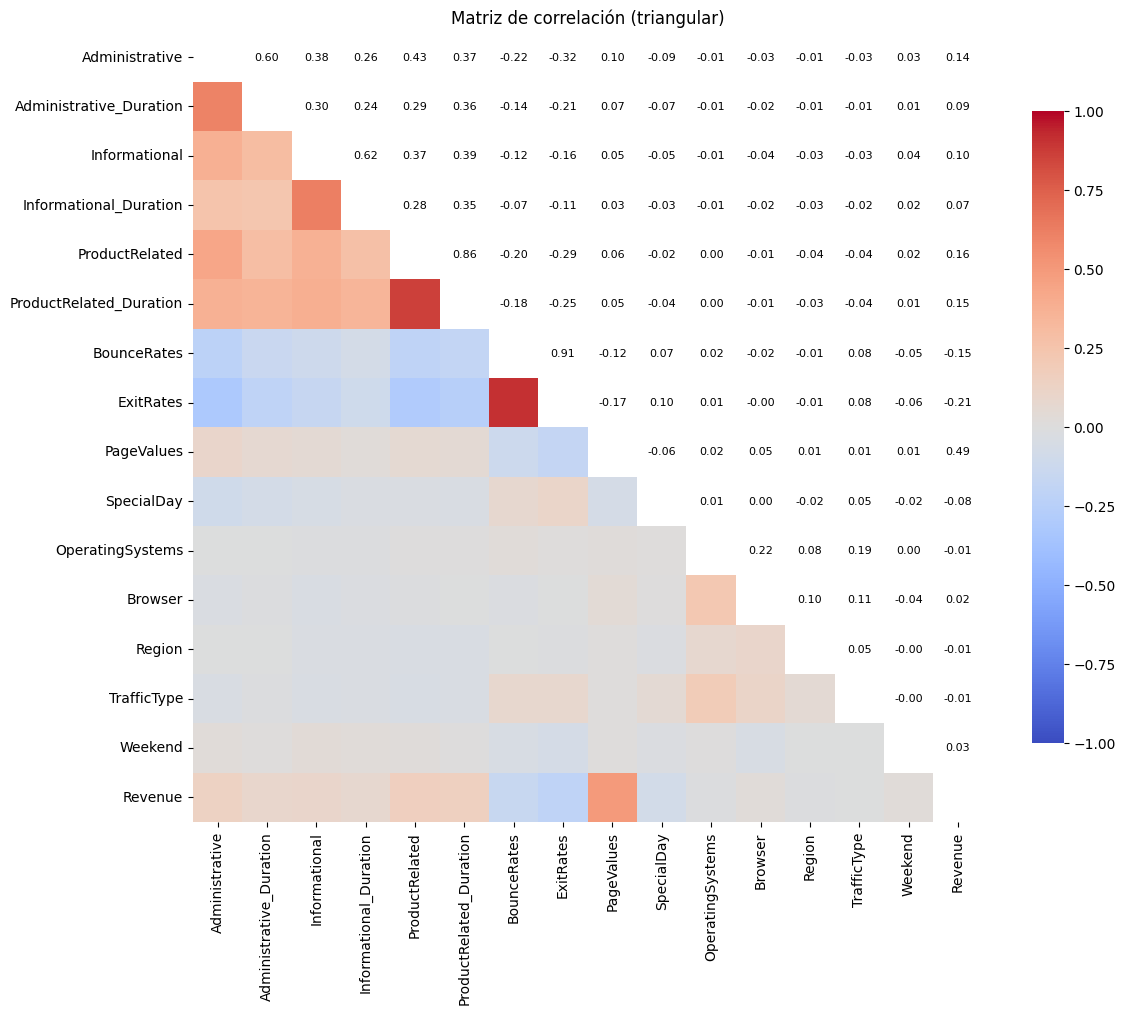

In [10]:
# Heatmap triangular de correlación
plt.figure(figsize=(12, 10))
# Ensure corr_matrix is available, assuming it's from a previous cell or re-run here
# If corr_matrix was not defined in an earlier cell, it should be defined here:
# numeric_df = df.select_dtypes(include='number')
# corr_matrix = numeric_df.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # máscara para triángulo superior

# Triángulo inferior con colores
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap="coolwarm",
    annot=False,
    square=True,
    cbar_kws={"shrink": 0.8},
    vmin=-1, vmax=1
)

# Triángulo superior con valores numéricos
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        if i < j:
            plt.text(
                j + 0.5,
                i + 0.5,
                f"{corr_matrix.iloc[i, j]:.2f}",
                ha="center", va="center",
                fontsize=8
            )

plt.title("Matriz de correlación (triangular)")
plt.tight_layout()
plt.show()


1. Administrative Duration – tiempo dedicado a páginas administrativas.
2. Informational Duration – duración en páginas informativas.
3. ProductRelated Duration – duración en páginas de productos.
4. BounceRates – proporción de visitas que abandonan sin interactuar
5. PageValues – valor medio de las páginas visitadas antes de comprar
6. SpecialDay – indicador de cercanía a fechas especiales
7. Month (variable categórica) – se codificó mediante one‐hot encoding.
8. VisitorType (categórica) – codificada a través de variables ficticias.
9. Weekend – indicador binario de fin de semana.

In [15]:
# Subconjunto de datos con las variables seleccionadas
# Define selected_features based on the description in text cell uZkSYl4ReylU
selected_features = [
    'Administrative_Duration', 'Informational_Duration',
    'ProductRelated_Duration', 'BounceRates', 'PageValues', 'SpecialDay',
    'Month', 'VisitorType', 'Weekend'
]

# Define X and y using the full DataFrame df and selected_features
X = df[selected_features]
y = df['Revenue'] # Assuming 'Revenue' is the target variable based on previous cells

# X_sub is already defined by X after selecting features
X_sub = X

# Re-definimos tipos para este subconjunto
numeric_cols_sub = X_sub.select_dtypes(include=['int64', 'float64', 'bool']).columns.tolist()
categorical_cols_sub = [c for c in X_sub.columns if c not in numeric_cols_sub]

print("Numéricas para modelos supervisados:", numeric_cols_sub)
print("Categóricas para modelos supervisados:", categorical_cols_sub)

Numéricas para modelos supervisados: ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'PageValues', 'SpecialDay', 'Weekend']
Categóricas para modelos supervisados: ['Month', 'VisitorType']


In [14]:
# Detección simple de bloques de colinealidad (umbral 0.8)
corr_abs = corr_matrix.abs()
upper = corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(bool))

high_corr_pairs = [
    (col, row, upper.loc[row, col])
    for col in upper.columns
    for row in upper.index
    if not pd.isna(upper.loc[row, col]) and upper.loc[row, col] > 0.8
]

print("Pares altamente correlacionados (|corr| > 0.8):")
for a, b, v in high_corr_pairs:
    print(f"{a} - {b}: {v:.2f}")

Pares altamente correlacionados (|corr| > 0.8):
ProductRelated_Duration - ProductRelated: 0.86
ExitRates - BounceRates: 0.91


   ## 3. Preparación de datos para modelos supervisados

        Transformamos las variables categóricas mediante codificación one‑hot y
        normalizamos las variables numéricas usando `StandardScaler`. Dividimos
        los datos en un conjunto de entrenamiento y otro de prueba (70/30).

In [16]:
# Definir variables independientes X y objetivo y
X = df[selected_features]
y = df['Revenue']

# Identificar columnas numéricas y categóricas en X
numeric_cols = ['Administrative_Duration', 'Informational_Duration',
                'ProductRelated_Duration', 'BounceRates', 'PageValues', 'SpecialDay']
categorical_cols = ['Month', 'VisitorType', 'Weekend']

# Definir transformador para preprocesar columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

# Dividir en entrenamiento y prueb

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


   ## 4. Modelos supervisados: Regresión logística (sklearn)

        Aplicamos una regresión logística utilizando un pipeline con el preprocesamiento
        definido. Evaluamos el desempeño mediante exactitud, precisión, recall,
        F1 y AUC. También construimos la matriz de confusión.

Métricas Regresión Logística (sklearn):
Accuracy: 0.870
Precision: 0.559
Recall: 0.750
F1: 0.641
AUC: 0.904


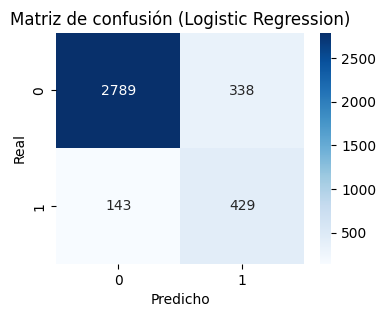

In [18]:
# Crear modelo de regresión logística dentro del pipeline
lr_clf = Pipeline(steps=[('preprocess', preprocessor),
                        ('model', LogisticRegression(max_iter=1000, class_weight='balanced'))])

# Ajustar modelo
lr_clf.fit(X_train, y_train)

# Predicciones y probabilidades
y_pred_lr = lr_clf.predict(X_test)
y_proba_lr = lr_clf.predict_proba(X_test)[:, 1]

# Métricas
metrics_lr = {
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'Precision': precision_score(y_test, y_pred_lr),
    'Recall': recall_score(y_test, y_pred_lr),
    'F1': f1_score(y_test, y_pred_lr),
    'AUC': roc_auc_score(y_test, y_proba_lr)
}
print("Métricas Regresión Logística (sklearn):")
for k, v in metrics_lr.items():
    print(f"{k}: {v:.3f}")

# Matriz de confusión
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de confusión (Logistic Regression)')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()
